C:\Users\ihuentecura\AppData\Local\Temp\ipykernel_7464\3927873643.py:6: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/PS_2024.04.02_11.16.01.csv')


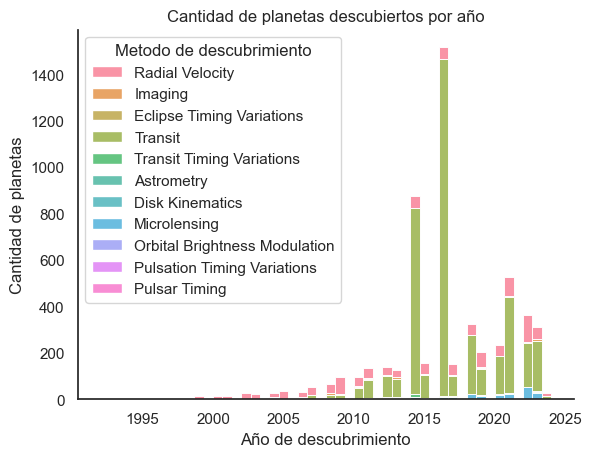

,Metodo de descubrimiento,Año,Periodo Orbital,Tipo Estrella,Radio Planeta,Masa Planeta,Masa Estrella,Error Periodo Orbital +,Error Periodo Orbital -
0,Radial Velocity,2007,NaN,Published Confirmed,NaN,NaN,2.60,NaN,NaN
3,Radial Velocity,2009,516.21997,Published Confirmed,NaN,NaN,2.78,3.200,-3.200
6,Radial Velocity,2008,186.76000,Published Confirmed,NaN,NaN,1.78,0.110,-0.120
9,Radial Velocity,2002,1773.40000,Published Confirmed,NaN,NaN,NaN,2.500,-2.500
17,Radial Velocity,1996,799.45000,Published Confirmed,NaN,NaN,0.98,0.150,-0.150
...,...,...,...,...,...,...,...,...,...
35873,Radial Velocity,1996,4.61100,Published Confirmed,NaN,NaN,1.20,0.005,-0.005
35880,Radial Velocity,1999,240.94020,Published Confirmed,NaN,4443.24113,1.31,0.047,-0.047
35886,Radial Velocity,1999,1282.41000,Published Confirmed,NaN,NaN,1.29,0.930,-0.940
35892,Radial Velocity,2021,385.20000,Published Confirmed,NaN,NaN,1.48,2.800,-1.300


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/PS_2024.04.02_11.16.01.csv')
# Dejar solo planeta confirmados, metodo deteccion, nombre planeta, periodo orbital, año de descubrimiento, masa y radio del planeta tierra
col_list = ['pl_name', 'discoverymethod', 'disc_year','pl_orbper','soltype', 'pl_rade','pl_masse','st_mass','pl_orbpererr1', 'pl_orbpererr2']
df = df[col_list]
# Traducir nombres de columnas
df.columns = ['Nombre', 'Metodo de descubrimiento', 'Año', 'Periodo Orbital', 'Tipo Estrella', 'Radio Planeta', 'Masa Planeta', 'Masa Estrella', 'Error Periodo Orbital +', 'Error Periodo Orbital -']
# Crear mi estilo de graficos
sns.set_theme(style='white')
# Quitar eje superior y derecho
sns.set(style='white', rc={'axes.spines.right': False, 'axes.spines.top': False})

# Dejar planetas confirmados unicos
df_filter = df.drop_duplicates(subset=['Nombre'])
# Drop filas con valores nulos
#df_filter = df_filter.dropna()
# Dropear columna pl_name
df_filter = df_filter.drop(columns=['Nombre'])
# Hacer histograma de años disc_year vs metodos de descubrimiento discoverymethod
sns.histplot(data=df_filter, x='Año', hue='Metodo de descubrimiento', multiple='stack')
# Traducir al español
plt.xlabel('Año de descubrimiento')
plt.ylabel('Cantidad de planetas')
plt.title('Cantidad de planetas descubiertos por año')
plt.show()

df_filter




C:\Users\ihuentecura\AppData\Local\Temp\ipykernel_7464\476781090.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_filter, y='Metodo de descubrimiento', order=comunes_3.index, palette='Set3')


([], [])

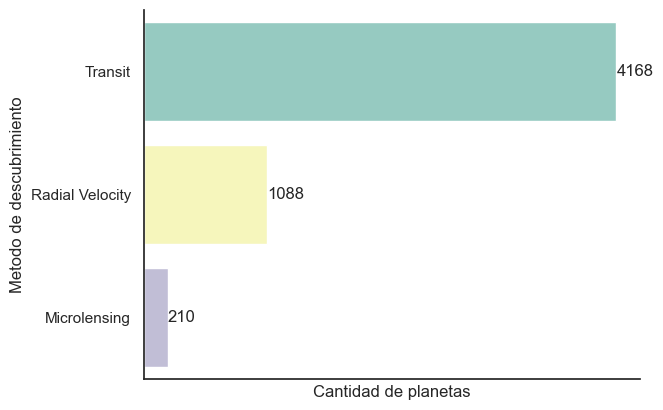

In [10]:
# Cuales son las 3 tecnicas de descubrimiento mas comunes
comunes_3 = df_filter['Metodo de descubrimiento'].value_counts().head(3)

# Gráfico de barras de las 3 tecnicas de descubrimiento mas comunes, en el eje x tiene que estar desde el 0 hasta el 80
plt.figure()
ax = sns.countplot(data=df_filter, y='Metodo de descubrimiento', order=comunes_3.index, palette='Set3')

# Agregar números en las barras
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width(), p.get_y() + p.get_height() / 2), ha = 'left', va = 'center')

plt.xlabel('Cantidad de planetas')
# Quitar ticks del eje x
plt.xticks([])

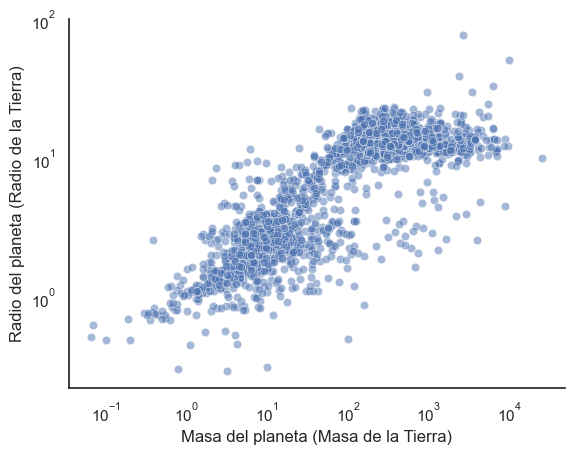

In [11]:
# Existe una relacion entre la masa del planeta y el radio del planeta?
# Incluir incertezas de cada valor
# Hacer un scatter plot con los valores de masa y radio
plt.figure()
sns.scatterplot(data=df, x='Masa Planeta', y='Radio Planeta', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Masa del planeta (Masa de la Tierra)')
plt.ylabel('Radio del planeta (Radio de la Tierra)')
plt.show()


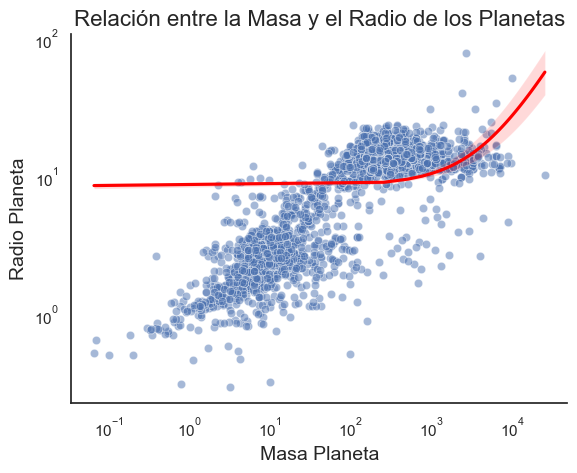

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Configurar escala logarítmica para ambos ejes
ax.set_xscale('log')
ax.set_yscale('log')

# Etiquetas de los ejes
ax.set_xlabel('Masa del planeta (Masa de la Tierra)', fontsize=14)
ax.set_ylabel('Radio del planeta (Radio de la Tierra)', fontsize=14)

# Título del gráfico
ax.set_title('Relación entre la Masa y el Radio de los Planetas', fontsize=16)

# Crear el scatter plot con incertidumbre en los datos
sns.scatterplot(data=df, x='Masa Planeta', y='Radio Planeta', alpha=0.5, ax=ax)

# Ajustar una línea de regresión a los datos
sns.regplot(data=df, x='Masa Planeta', y='Radio Planeta', scatter=False, color='red', ax=ax)

# Mejorar la estética del gráfico
sns.despine()

# Mostrar el gráfico
plt.show()


In [21]:
from scipy import stats

# Limpíar nans
df = df.dropna(subset=['Masa Planeta', 'Radio Planeta'])

# Extraer las columnas de interés del DataFrame
masa = df['Masa Planeta']
radio = df['Radio Planeta']



# Calcular el coeficiente de correlación de Pearson y el valor p
coef, p = stats.pearsonr(masa, radio)



# Interpretar el valor p
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print('No se rechaza la hipótesis nula: no hay correlación.')
else:
    print('Se rechaza la hipótesis nula: hay correlación.')
    
print(f'Coeficiente de correlación de Pearson: {coef:.3f}')
print(f' y es una relación positiva')


Se rechaza la hipótesis nula: hay correlación.
Coeficiente de correlación de Pearson: 0.307
 y es una relación positiva


In [ ]:
# Calcular la correlacion entre masa y radio
correlation = df['Masa Planeta'].corr(df['Radio Planeta'])
print(correlation)

0.3071838760716857


In [ ]:
# 3 Indicadores
# Realice un breve informe maximo de 5 